# Electricity Consumption Forecasting using Prophet

---

This analysis explores historical electricity consumption data and utilizes the Prophet library to forecast future consumption trends. The aim is to identify patterns and provide a projection of consumption for the next six months.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/electricity_consumption.csv")
df

,date,sector,consumption
0,2018-01-01,total,13156.104060
1,2018-02-01,total,12097.296630
2,2018-03-01,total,14028.979490
3,2018-04-01,total,13604.821690
4,2018-05-01,total,13934.682720
...,...,...,...
463,2024-02-01,losses,724.517838
464,2024-03-01,losses,1273.227617
465,2024-04-01,losses,1045.885614
466,2024-05-01,losses,1294.274307


In [ ]:
df.drop("sector", axis=1, inplace=True)
df

,date,consumption
0,2018-01-01,13156.104060
1,2018-02-01,12097.296630
2,2018-03-01,14028.979490
3,2018-04-01,13604.821690
4,2018-05-01,13934.682720
...,...,...
463,2024-02-01,724.517838
464,2024-03-01,1273.227617
465,2024-04-01,1045.885614
466,2024-05-01,1294.274307


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         468 non-null    object 
 1   consumption  468 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [ ]:
df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['consumption']

In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn3kiqt6x/rypuiv6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn3kiqt6x/tvvaz5k0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49812', 'data', 'file=/tmp/tmpn3kiqt6x/rypuiv6e.json', 'init=/tmp/tmpn3kiqt6x/tvvaz5k0.json', 'output', 'file=/tmp/tmpn3kiqt6x/prophet_modelzenp9106/prophet_model-20251002023837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:38:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:38:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods= 6,freq="M")
future.head()

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01


In [ ]:
print("\nMaking predictions...")

forecast = model.predict(future)

# Show main forecast values with confidence intervals
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
# yhat       -> Forecast
# yhat_lower -> Lower forecast value
# yhat_upper -> Upper forecast value


Making predictions...


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,6430.508192,-754.134780,13465.382770
1,2018-02-01,5964.149845,-1098.781975,12630.369125
2,2018-03-01,6709.924332,-664.955303,13900.132089
3,2018-04-01,6434.365965,18.146133,13642.598028
4,2018-05-01,6766.262842,-470.985878,13538.925902
...,...,...,...,...
79,2024-07-31,7399.167583,778.081715,14673.977173
80,2024-08-31,7228.702662,103.223100,14542.766992
81,2024-09-30,7476.434947,616.962733,14613.812293
82,2024-10-31,7203.860970,-585.441506,14041.391807



Visualise the forecast


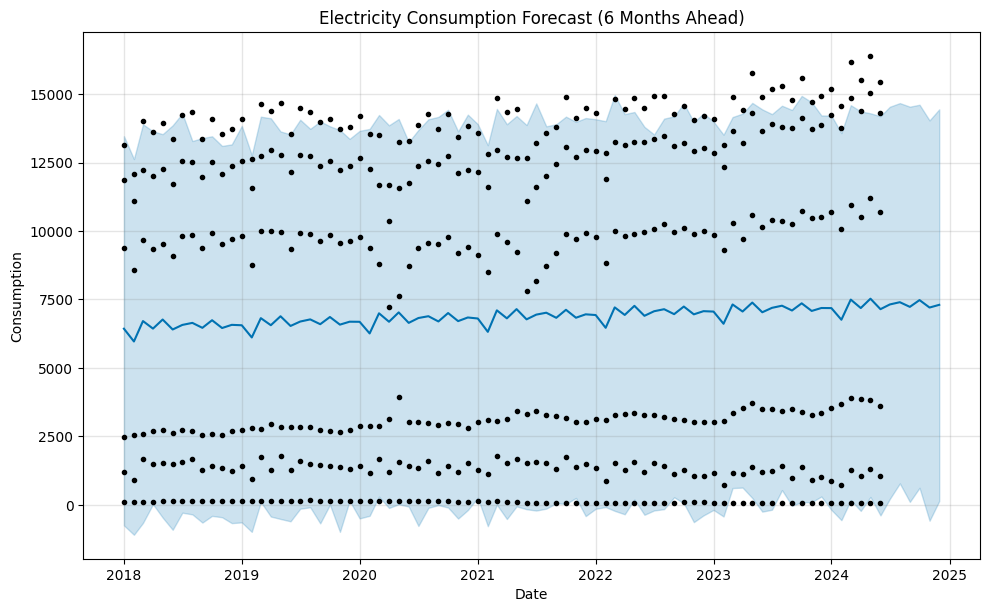

In [ ]:
print("\nVisualise the forecast")

fig = model.plot(forecast)

# Add custom title and axis labels
plt.title("Electricity Consumption Forecast (6 Months Ahead)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.show()

In [ ]:
forecast_6_months = forecast.tail(6)
forecast_6_months['yhat']

,yhat
78,7316.756383
79,7399.167583
80,7228.702662
81,7476.434947
82,7203.860970
83,7302.698881



Visualise the forecast


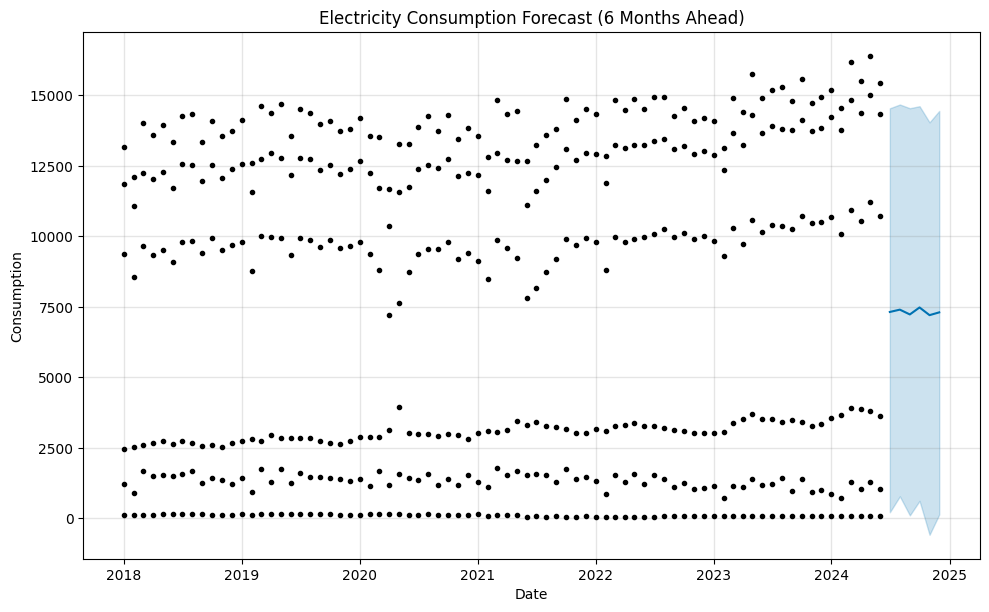

In [ ]:
print("\nVisualise the forecast")

fig = model.plot(forecast_6_months)

# Add custom title and axis labels
plt.title("Electricity Consumption Forecast (6 Months Ahead)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.show()

## Findings and Conclusion

Based on the Prophet model's forecast for the next six months, the electricity consumption is projected to be approximately 7316.76 in July 2024, 7399.17 in August 2024, 7228.70 in September 2024, 7476.43 in October 2024, 7203.86 in November 2024, and 7302.70 in December 2024.

The forecast indicates a general trend with some monthly variations. The confidence intervals show the range within which the actual consumption is likely to fall. The visualizations also highlight the historical trend and the projected future consumption.

**Conclusion:**

The analysis provides a reasonable projection of electricity consumption for the next six months. The model captures the historical patterns and seasonalities in the data. However, it's important to note that forecasts are subject to uncertainty, and the actual consumption may vary from the projected values. Further analysis with additional features or different models could potentially improve the accuracy of the forecast.